# Preliminary Data Analysis
### 2. PCA Analysis

This notebook contains the code that generated Figure 2 in the original manuscript.

This code reads teh VCF files submitted by the students along with the high-confidence VCF file. It created a binary matrix whose details has been shared in the original manuscript. It applies PCA to the resulting binary matrix, saves, and prints the resukting PCA plot.

In [3]:
%load_ext autoreload
%autoreload 2

from utils import *
import os

In [4]:
DIRECTORY = os.getcwd()

### Jaccard Similarity Heatmap

In [5]:
all_vcfs = []

pipelines = ["mutect_yb_bwa", 
             "mutect_yb_bowtie", 
             "mutect_nb_bwa", 
             "mutect_nb_bowtie", 
             "strelka_yb_bwa", 
             "strelka_yb_bowtie", 
             "strelka_nb_bwa", 
             "strelka_nb_bowtie",
             "ss_nb_bowtie",
             "ss_nb_bwa",
             "ss_yb_bowtie",
             "ss_yb_bwa"]

hc_vcf = os.path.join(DIRECTORY, "hc_bed_filtered.recode.vcf")


for pipline in iter(pipelines):
    filename = read_all_vcfs(os.path.join(DIRECTORY, pipline))
    for file in filename:
        all_vcfs.append(os.path.join(DIRECTORY, pipline, file))
all_vcfs.append(hc_vcf)

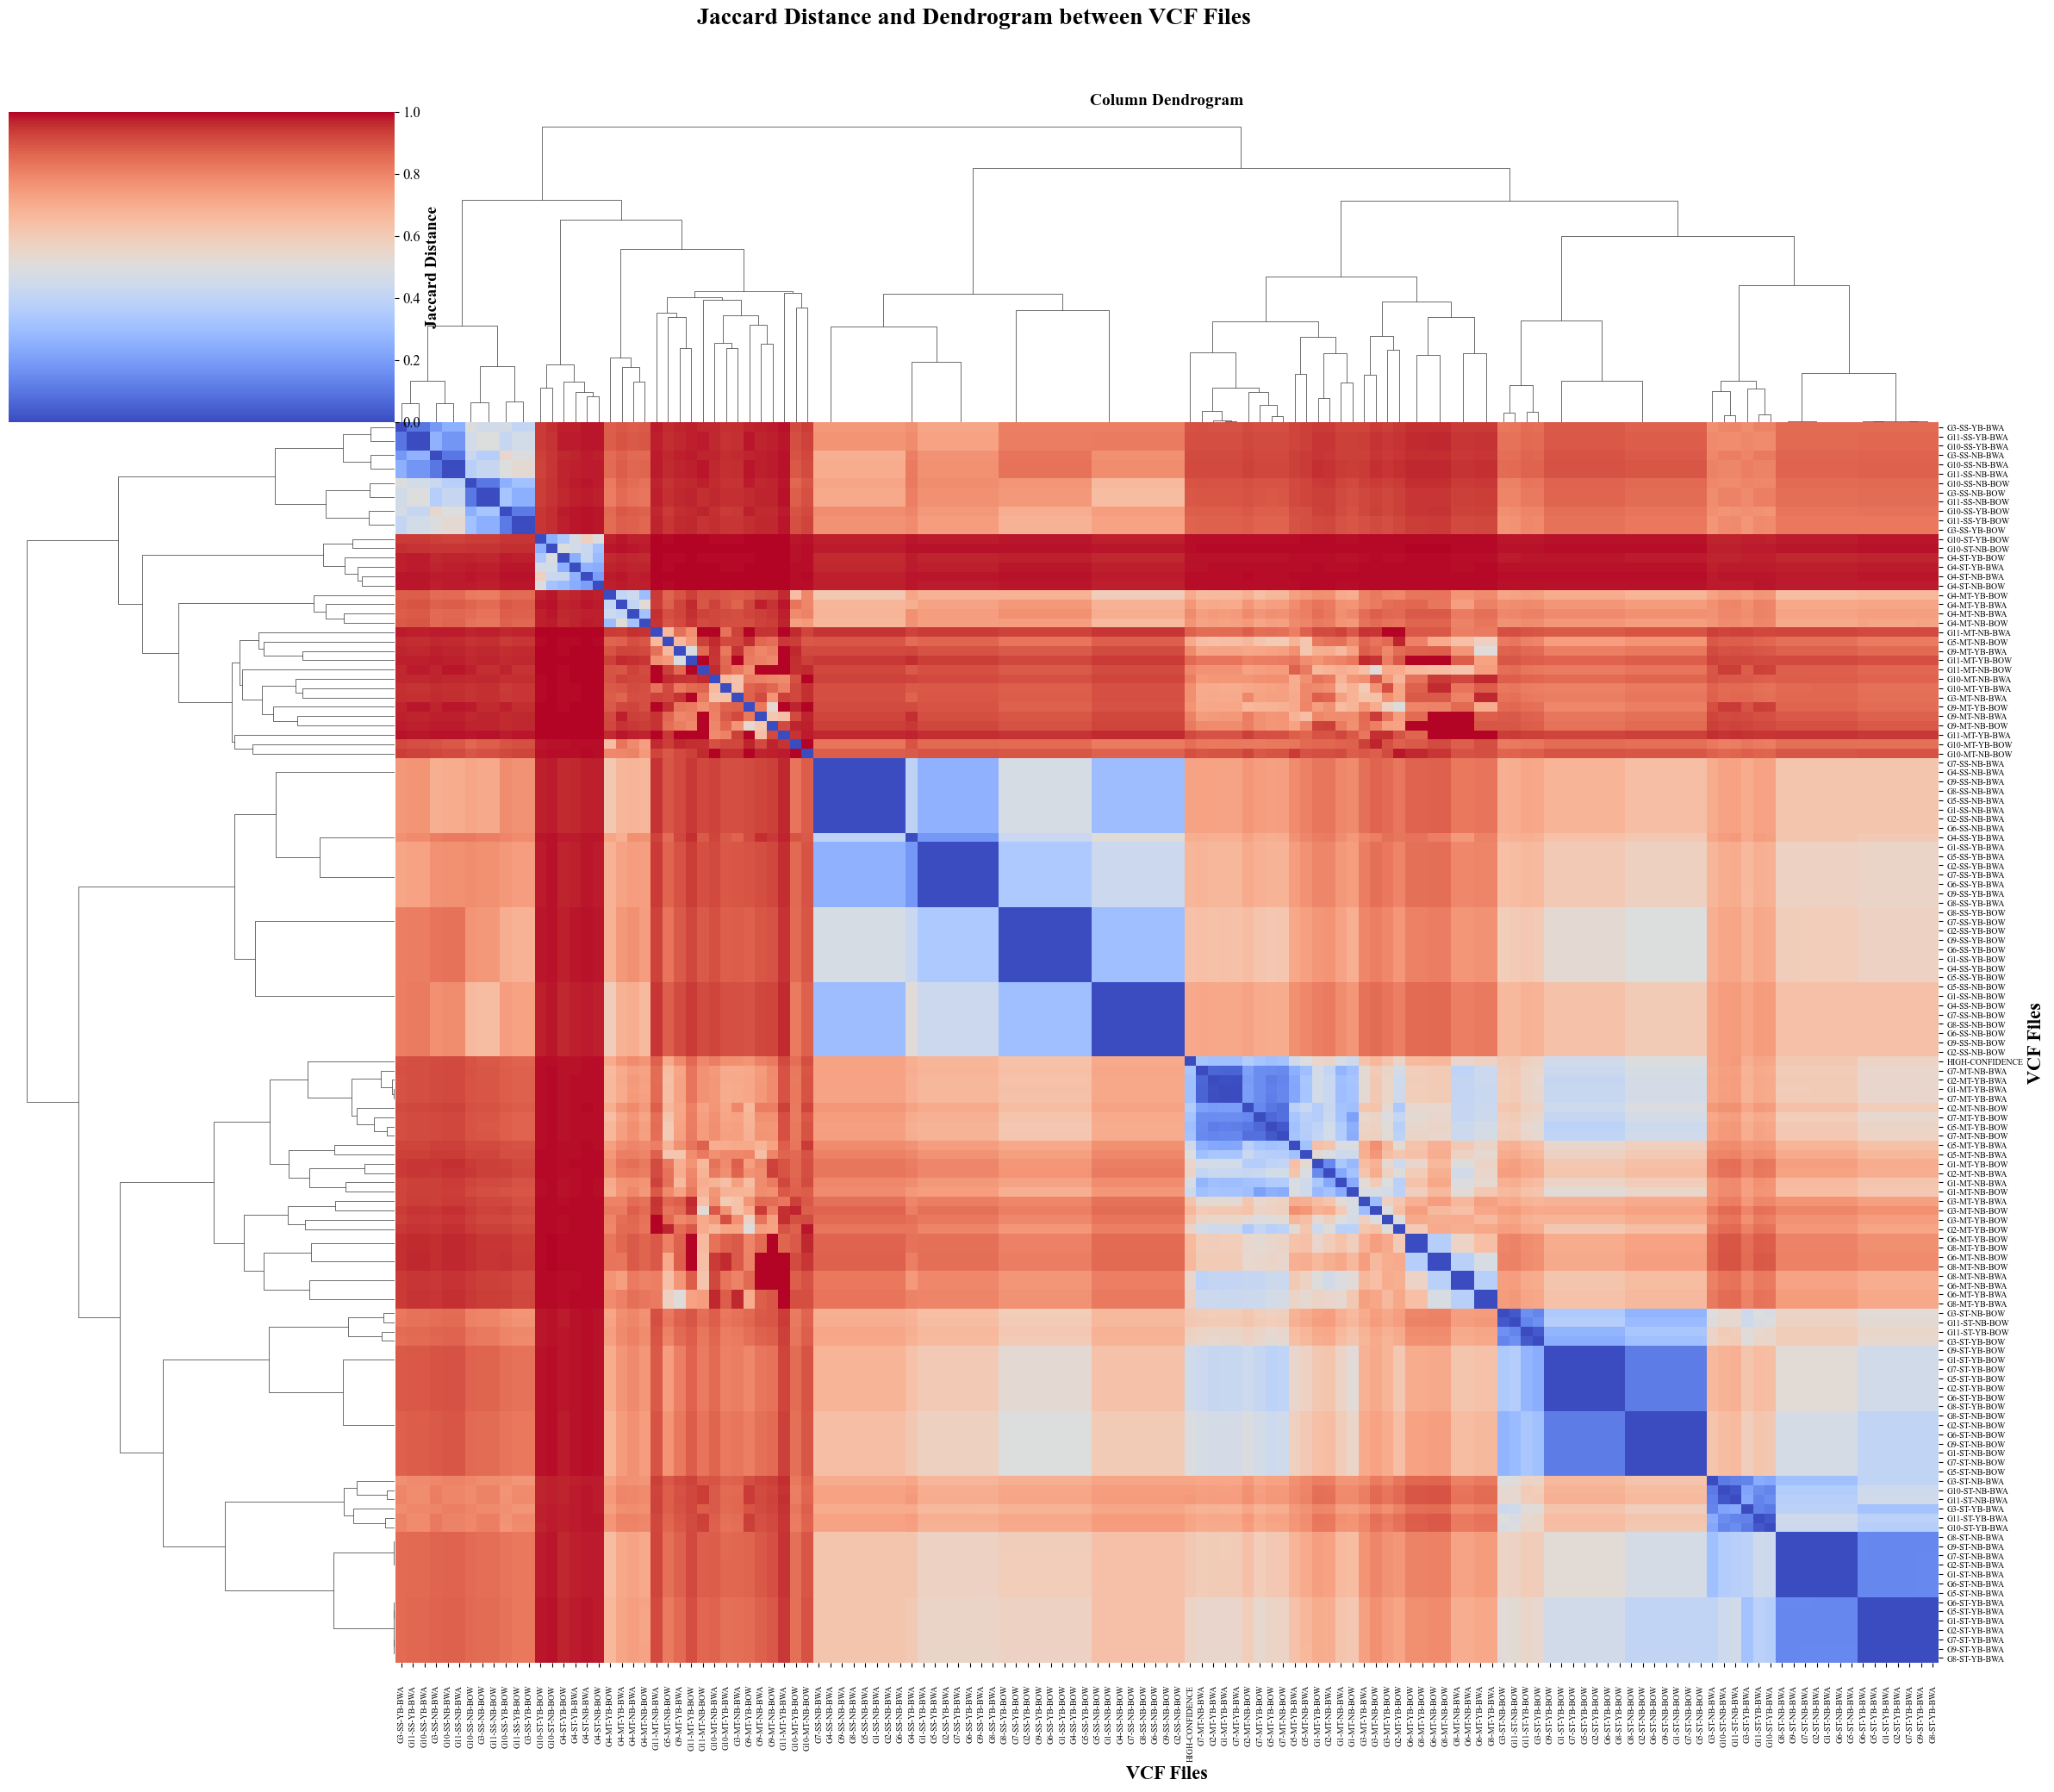

In [4]:
plot_jaccard_similarity_matrix(all_vcfs, "Jaccard Similarities")

-----

### PCA Analysis

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


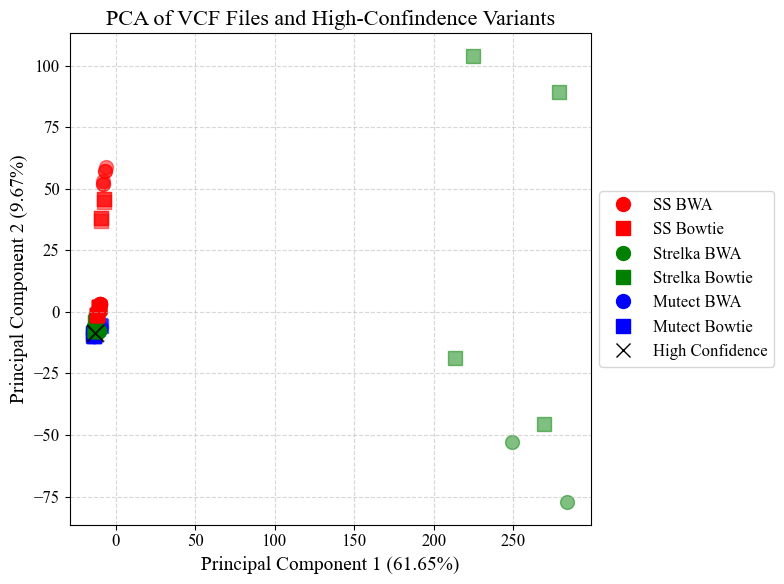

In [11]:
plot_pca(all_vcfs, "PCA_plot")

In [24]:
def plot_pca_2(vcf_files, plt_title):
    # Identify unique variants across all files
    all_variants = set()
    for file_path in vcf_files:
        all_variants |= parse_vcf(file_path)

    # Sort variants to ensure consistent ordering
    all_variants = sorted(list(all_variants))

    # Create a binary matrix for presence/absence of variants in each file
    binary_matrix = np.zeros((len(vcf_files), len(all_variants)), dtype=int)
    for i, file_path in enumerate(vcf_files):
        file_variants = parse_vcf(file_path)
        for j, variant in enumerate(all_variants):
            if variant in file_variants:
                binary_matrix[i, j] = 1

    # Perform PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(binary_matrix)
    # Extract explained variance ratio
    explained_variance = pca.explained_variance_ratio_

    mapping = {"g1": ["linux", "docker"], "g2": ["linux", "docker"], "g3": ["linux", "github"], "g4": ["wsl", "docker"], "g5": ["wsl", "github"], "g6": ["linux", "github"],"g7": ["linux", "github"], "g8": ["linux", "github"], "g9": ["wsl", "docker"], "g10": ["wsl", "docker"], "g11": ["wsl", "docker"]}


    # Plot the PCA results
    plt.figure(figsize=(8, 6))
    plt.rcParams.update({"font.size": 12, "font.family": "Times New Roman"})

    colors_markers = {}
    colors = {"linux": "purple", "wsl": "orange"}
    markers = {"docker": "P", "github": "^", "bed": "x"}
    for file_path in vcf_files:
        if "bed" not in file_path:
            colors_markers[file_path.split("/")[-1][:-4]] = (
                colors[mapping[file_path.split("/")[-1].split("_")[0]][0]],
                markers[mapping[file_path.split("/")[-1].split("_")[0]][1]]
            )


    for i, file_path in enumerate(vcf_files):
        if "bed" not in file_path:
            c = colors[mapping[file_path.split("/")[-1].split("_")[0]][0]]
            m = markers[mapping[file_path.split("/")[-1].split("_")[0]][1]]

            plt.scatter(
                principalComponents[i, 0],
                principalComponents[i, 1],
                label=file_path.split("/")[-1][:-4],
                c=c,
                marker=m,
                alpha=0.5,
                s=100,
            )
        else:
            plt.scatter(
                principalComponents[i, 0],
                principalComponents[i, 1],
                label=file_path.split("/")[-1][:-4],
                s=150,
                c="k",
                marker="x",
                alpha=0.8,
            )

    # access legend objects automatically created from data
    handles, labels = plt.gca().get_legend_handles_labels()

    # create manual symbols for legend
    ld = Line2D(
        [0], [0], label="Linux-Docker", marker="P", markersize=10, c="purple", linestyle=""
    )
    wd = Line2D(
        [0], [0], label="WSL-Docker", marker="P", markersize=10, c="orange", linestyle=""
    )
    lg = Line2D(
        [0], [0], label="Linux-Github", marker="^", markersize=10, c="purple", linestyle=""
    )
    wg = Line2D(
        [0], [0], label="WSL-Github", marker="^", markersize=10, c="orange", linestyle=""
    )
    
    bed = Line2D(
        [0],
        [0],
        label="High Confidence",
        marker="x",
        markersize=10,
        color="k",
        linestyle="",
    )

    # add legend to plot
    plt.legend(
        handles=[
            ld,
            wd,
            lg,
            wg,
            bed,
        ],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
    )
    plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}%)", fontsize=14)
    plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}%)", fontsize=14)
    plt.title("PCA of VCF Files and High-Confindence Variants", fontsize=16)
    plt.grid(linestyle="--", alpha=0.5)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.savefig(os.path.join("Figures", "".join(plt_title) + ".pdf"))
    plt.savefig(os.path.join("Figures", "".join(plt_title) + ".eps"), format="eps")

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


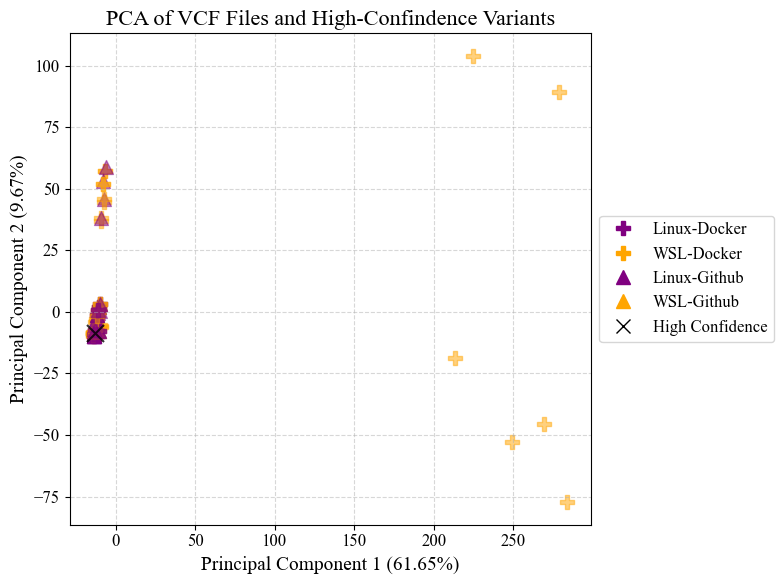

In [25]:
plot_pca_2(all_vcfs, "PCA_plot")